## Data Wrangling Project- WeRate Dogs
#### by Theodora Koutsothanasi

#### Introduction 

In this project, we will gather, assess, and clean twitter data- WeRate Dogs and then we will proceed on data analysis and visualization.

In [1]:
# Import useful liblaries
import requests
import pandas as pd
import numpy as np
import tweepy
import json
import time
import matplotlib.pyplot as plt

In [2]:
# Read the csv file for the twitter-archive
twitter_archive = pd.read_csv(r'C:\Users\Dora\Desktop\Udacity\Project5_DataWrangling\Resources\twitter_archive_enhanced.csv')

twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Gathering tweet data using tweet id for accessing API
tweet_id_ =list(twitter_archive['tweet_id'])

In [1]:
#Code for accessing data from the API
# Provided it as comments, not included Twitter API keys, secrets, and tokens.
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    \n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\

In [4]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open(r'C:\Users\Dora\Desktop\Udacity\Project5_DataWrangling\Resources\tweet_json.txt')

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [5]:
# Create a dataframe to store the data from the tweets
tweet_df = pd.DataFrame()

In [6]:
# Add selected variables to tweet_info DataFrame
tweet_df['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

tweet_df.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
#Download image_predictions file
with open('image_predictions.tsv' , 'wb') as file:
    image_f = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    file.write(image_f.content)

In [8]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assess

### Twitter Archive Dataset

In [9]:
# First 100 rows of twitter_archive DataFrame
twitter_archive.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#View some basic info for the twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#View descriptive statistics for the twitter_archive dataset
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#Rating numerator. The climax of a dog's rating is 10.
#Check how rating numerator values are distributed
ratings=twitter_archive['rating_numerator'].value_counts()
print(ratings)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [13]:
#Accordingly check the rating denominator, which should be 10.

ratings_d=twitter_archive['rating_denominator'].value_counts()
print(ratings_d)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [14]:
## We need unique dogs that have been rated, so let's check the retweet column.

retweet=twitter_archive['retweeted_status_user_id'].value_counts().sum()
print(retweet)

181


In [15]:
## We do not need the "replies" in our data, so let's review if there are any
replies_to_user=twitter_archive['in_reply_to_user_id'].value_counts().sum()
print(replies_to_user)

78


In [16]:
# Dog Names column
dog_names=twitter_archive['name'].value_counts()
print(dog_names)

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Bailey         7
Daisy          7
Buddy          7
an             7
Jack           6
Bella          6
Dave           6
Scout          6
Stanley        6
Koda           6
Leo            6
Rusty          6
Jax            6
Milo           6
Oscar          6
Larry          5
            ... 
Clifford       1
Fillup         1
Spanky         1
Antony         1
Fabio          1
Crumpet        1
Leonidas       1
Combo          1
Gabby          1
Bruiser        1
Ulysses        1
Chevy          1
Brownie        1
Mark           1
Nigel          1
Tino           1
Blu            1
Raphael        1
Donny          1
Spencer        1
Socks          1
Geno           1
Skye           1
Stuart         1
Taz            1
Aqua           1
Ziva           1
Grizzwald     

In [17]:
# Dog Stages columns
doggo=twitter_archive['doggo'].value_counts()
floofer=twitter_archive['floofer'].value_counts()
pupper=twitter_archive['pupper'].value_counts()
puppo=twitter_archive['puppo'].value_counts()
print(doggo,floofer,pupper,puppo)

None     2259
doggo      97
Name: doggo, dtype: int64 None       2346
floofer      10
Name: floofer, dtype: int64 None      2099
pupper     257
Name: pupper, dtype: int64 None     2326
puppo      30
Name: puppo, dtype: int64


### Retweets Data

In [12]:
#View the first 100 rows for a visual assess

tweet_df.head(100)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [20]:
#View basic info- Retweets Data

tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
#View Summary Retweets data

tweet_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Image Prediction

In [23]:
# View the first rows of data to visually assess the dataset
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
#Basic info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#Basic descriptive statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Comments after visual and programmatic assessment

#### Tidiness Issues
 
1) Join tweet_df (retweets data), twitter_archive, and image_predictions into one master dataset on 'tweet_id'. This structure will make the data analysis much easier than having three seperate datasets.We have single type of observational unit (tweet_id) spread out over multiple tables or files.

2) There is no need for seperate dog stages columns (e.g 'doggo','floffer','pupper' and 'puppo'). One column should be created,containing the necessary info.

#### Quality issues


##### twitter_archive table

1. Remove unnessecary columns:"in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" have a great amount of missing data.

2. We observe that the variable "expanded_urls" has some missing values, which means that these records had no images.Concequently, we should take into account only the dog ratings that have images.

3. The datatype of "timestamp" is not correct. It is a string (object) instead of a datetime.

4. The standard number for "rating_denominator" should be 10. Some discrepancies appear.

5. The "rating_numerator" also should have 10 as a max value.

6. Incorrect-non logical dog names. E.g (a,an etc) 

7. Dog names values sometimes begin with a first capital letter and sometimes not. We should keep the same name format.

8. Source has additional text, making difficult to understant the source of the tweet. We need to clean it and keep only the source.



##### image_predictions table

1. The columns'names are confusing, such as p1_conf,p2_conf. We need to rename them.
2. Different format name (begin with first capital or lower letter) for the columns p1,p2,p3



### Clean

In [13]:
# Creat copies tables for cleaning purposes

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

#### Tidiness Issues

1. Join tweet_df (retweets data), twitter_archive, and image_predictions into one master dataset on 'tweet_id'. This structure will make the data analysis much easier than having three seperate datasets. 

#### Define

We have single type of observational unit (tweet_id) spread out over multiple tables or files.

1a.In order to make a master file by joining Join tweet_df (retweets data), twitter_archive, and image_predictions, I will divide this issue into two steps. First, I will merge tweet_df table on twitter_archive table and after cleaning this dataset, I will join it with the cleaned image_predictions dataset to make the final master dataset.

#### Code

In [29]:
#Rename id column (tweet_df) to tweet_id(twitter_archive)to make the join.

tweet_df.rename(columns={'id': 'tweet_id'}, inplace = True)

In [32]:
# check the number of values in the two foreign keys
print(twitter_archive_clean.tweet_id.count())
print(tweet_df.tweet_id.count())

2356
2354


In [33]:
# Join tweet_df table on twitter_archive table using inner join method
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_df, on='tweet_id', how = 'inner')

###### Test

In [34]:
#Check the results of the table
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048


In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
retweet_count                 23

In [36]:
#We observe that the two tables have been merged correctly

2) Creating one column containing the dog stages

#### Define 

Create one dog_stage column, by combining dog_stage columns (doggo, floofer, pupper, puppo).
Delete the seperate dog stage categories after first be assured that there is not any row with more than one dog stage.

#### Code

In [13]:
# We use Pandas Series.str.cat() to concatenate the string of the dog stages.
# We need first to view the None values and how we will deal them. 
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].count()

tweet_id                      2259
in_reply_to_status_id           74
in_reply_to_user_id             74
timestamp                     2259
source                        2259
text                          2259
retweeted_status_id            171
retweeted_status_user_id       171
retweeted_status_timestamp     171
expanded_urls                 2203
rating_numerator              2259
rating_denominator            2259
name                          2259
doggo                         2259
floofer                       2259
pupper                        2259
puppo                         2259
dtype: int64

In [40]:
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461


In [41]:
# We will edit the none data to blank ("")

dog_stage = ['doggo','pupper', 'floofer', 'puppo']
for i in dog_stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')
        
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
retweet_count                 0
favorite_count                0
dtype: int64

In [42]:
#Test if columns have more than one stage in each row
l=twitter_archive_clean[(twitter_archive_clean['doggo']=='doggo') & (twitter_archive_clean['floofer']=='floofer')].count()['tweet_id']
b=twitter_archive_clean[(twitter_archive_clean['doggo']=='doggo') & (twitter_archive_clean['pupper']=='pupper')].count()['tweet_id']
n=twitter_archive_clean[(twitter_archive_clean['doggo']=='doggo') & (twitter_archive_clean['pupper']=='puppo')].count()['tweet_id']
print(l,b,n)

1 12 0


In [44]:
# use cat function to concatenate the strings 
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

In [45]:
# drop the old columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# Use np.nan to fill the empty rows
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('', np.nan)

In [14]:
# Dataset view
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [47]:
# Dog stages available values

length=twitter_archive_clean.groupby(['dog_stage']).count()['tweet_id']

print(length)

dog_stage
doggo            83
doggofloofer      1
doggopupper      12
doggopuppo        1
floofer           9
pupper          244
puppo            29
Name: tweet_id, dtype: int64


In [48]:
#Drop the values having 2 stages, as it is impossible

twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['dog_stage']!='doggofloofer']
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['dog_stage']!='doggopupper']
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['dog_stage']!='doggopuppo']

#### Test

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2353
Data columns (total 16 columns):
tweet_id                      2340 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2340 non-null object
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           177 non-null float64
retweeted_status_user_id      177 non-null float64
retweeted_status_timestamp    177 non-null object
expanded_urls                 2281 non-null object
rating_numerator              2340 non-null int64
rating_denominator            2340 non-null int64
name                          2340 non-null object
retweet_count                 2340 non-null int64
favorite_count                2340 non-null int64
dog_stage                     365 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 310.8+ KB


#### Quality issues

###### Twitter Archive

1.Keep unique tweets by removing retweets or replies.Remove columns having a lot of missing data.

#### Define

Remove unecessary columns with a lot of missing data and keep only unique tweets by removing retwwets and replies

#### Code

In [50]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

In [51]:
# 1.Drop the columns have a lot of missing data
drop_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(drop_columns, axis = 1)

##### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2086 non-null int64
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2083 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
dog_stage             325 non-null object
dtypes: int64(5), object(6)
memory usage: 195.6+ KB


2. Remove the rows with missing urls-missing photos

#### Define

Remove the rows with missing urls, because these rows do not have images.

#### Code

In [53]:
#Using pandas.DataFrame.dropna

twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

#### Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2083 non-null int64
timestamp             2083 non-null object
source                2083 non-null object
text                  2083 non-null object
expanded_urls         2083 non-null object
rating_numerator      2083 non-null int64
rating_denominator    2083 non-null int64
name                  2083 non-null object
retweet_count         2083 non-null int64
favorite_count        2083 non-null int64
dog_stage             324 non-null object
dtypes: int64(5), object(6)
memory usage: 195.3+ KB


In [55]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'] == 'NaN'].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
retweet_count         0
favorite_count        0
dog_stage             0
dtype: int64

3. Incorrect data type- timestamp field

#### Define

Convert timestamp from string to datetime

#### Code

In [56]:
# Use pandas.to_datetime series to change timestamp data type
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2083 non-null int64
timestamp             2083 non-null datetime64[ns, UTC]
source                2083 non-null object
text                  2083 non-null object
expanded_urls         2083 non-null object
rating_numerator      2083 non-null int64
rating_denominator    2083 non-null int64
name                  2083 non-null object
retweet_count         2083 non-null int64
favorite_count        2083 non-null int64
dog_stage             324 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 195.3+ KB


4. and 5. Rating_denominator and Rating_numerator should be 10

We will deal with the rating_denominator and rating_numerator problems together, since those two columns go hand in hand.

#### Define

Create a new rating column assuming that the denominator is 10. However,we will keep the old data because may be helpful for our later data analysis.

#### Code

In [455]:
#Check the numerator for the rows having denominator different from 10.

f = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
print(f)

                tweet_id                 timestamp  \
432   820690176645140481 2017-01-15 17:52:40+00:00   
515   810984652412424192 2016-12-19 23:06:23+00:00   
900   758467244762497024 2016-07-28 01:00:57+00:00   
1066  740373189193256964 2016-06-08 02:41:38+00:00   
1118  731156023742988288 2016-05-13 16:15:54+00:00   
1163  722974582966214656 2016-04-21 02:25:47+00:00   
1200  716439118184652801 2016-04-03 01:36:11+00:00   
1226  713900603437621249 2016-03-27 01:29:02+00:00   
1252  710658690886586372 2016-03-18 02:46:49+00:00   
1272  709198395643068416 2016-03-14 02:04:08+00:00   
1349  704054845121142784 2016-02-28 21:25:30+00:00   
1431  697463031882764288 2016-02-10 16:51:59+00:00   
1633  684222868335505415 2016-01-05 04:00:18+00:00   
1660  682962037429899265 2016-01-01 16:30:13+00:00   
1777  677716515794329600 2015-12-18 05:06:23+00:00   
1841  675853064436391936 2015-12-13 01:41:41+00:00   
2333  666287406224695296 2015-11-16 16:11:11+00:00   

                           

We observe two types of errors in tweets with denominator <> 10.
1) Rating numarator and denominator above 10, but numarator lower than denominator
2) Rating numatator above 10, but with a lower denominator.

We will use an equal rating function to convert the ratings in the first case and we will later reassess the values in the second one.

The equation will be: 
    
    
\begin{equation*}
{Rating {Numerator}*10}= x*Rating {Denominator}
\end{equation*}


In [64]:
#Create a new column that contains an equivalent rating, having 10 as a denominator
rating_n=(twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator'])*10

In [65]:
twitter_archive_clean = twitter_archive_clean.assign(rating_n=(twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator'])*10)

In [66]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,rating_n
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,NaN,12.0


In [61]:
# 2. Check  the rows with numerator higher than denominator and denominator<>10.

q = twitter_archive_clean[(twitter_archive_clean['rating_denominator'] != 10) & (twitter_archive_clean['rating_numerator'] > twitter_archive_clean['rating_denominator'])]
print(q)

                tweet_id                 timestamp  \
432   820690176645140481 2017-01-15 17:52:40+00:00   
515   810984652412424192 2016-12-19 23:06:23+00:00   
900   758467244762497024 2016-07-28 01:00:57+00:00   
1118  731156023742988288 2016-05-13 16:15:54+00:00   
1226  713900603437621249 2016-03-27 01:29:02+00:00   
1349  704054845121142784 2016-02-28 21:25:30+00:00   
1431  697463031882764288 2016-02-10 16:51:59+00:00   
1633  684222868335505415 2016-01-05 04:00:18+00:00   
1777  677716515794329600 2015-12-18 05:06:23+00:00   
1841  675853064436391936 2015-12-13 01:41:41+00:00   

                                                 source  \
432   <a href="http://twitter.com/download/iphone" r...   
515   <a href="http://twitter.com/download/iphone" r...   
900   <a href="http://twitter.com/download/iphone" r...   
1118  <a href="http://twitter.com/download/iphone" r...   
1226  <a href="http://twitter.com/download/iphone" r...   
1349  <a href="http://twitter.com/download/iphone" 

In [62]:
# Check how many rows belong to the 2nd category of error.
a = twitter_archive_clean[(twitter_archive_clean['rating_denominator'] == 10) & (twitter_archive_clean['rating_numerator'] >twitter_archive_clean['rating_denominator'])].count()
print(a)

tweet_id              1219
timestamp             1219
source                1219
text                  1219
expanded_urls         1219
rating_numerator      1219
rating_denominator    1219
name                  1219
retweet_count         1219
favorite_count        1219
dog_stage              219
rating_n              1219
dtype: int64


###### Since 1228 values have greater result than denominator, we cannot remove the values, as they contain useful information. Creating the rating_n column is helpful, because we will have an equivalent rating, assuming that the denominator is 10.

#### Test

In [16]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

6. Incorrect dog names

#### Define

Observe again the wrong names and replace then with NaN

#### Code

In [68]:
# Observe again which names are wrong
twitter_archive_clean['name'].value_counts().head(60)

None        594
NaN          69
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Winston       8
Sadie         8
Toby          7
Daisy         7
Oscar         6
Stanley       6
Bella         6
Bailey        6
Bo            6
Jax           6
Koda          6
Milo          5
Buddy         5
Chester       5
Louis         5
Scout         5
Leo           5
Dave          5
Bentley       5
Rusty         5
Winnie        4
Chip          4
very          4
Finn          4
Gus           4
Bear          4
Archie        4
Alfie         4
one           4
Phil          4
Jerry         4
Scooter       4
Dexter        4
Reggie        4
Clark         4
George        4
Derek         4
Oakley        4
Larry         4
Duke          4
Jeffrey       4
Gary          4
Cassie        4
Boomer        4
Sophie        4
Jack          4
Brody         4
Clarence      4
Sammy         4
Zeke          3
Maggie        3
Name: name, dtype: int64

In [67]:
# we observe that the most frequent incorrect names are a, an and the. We can replace these names with null values

wrong_name = ['a','the','an']
for i in wrong_name:
        twitter_archive_clean['name'].replace(i, 'NaN', inplace=True)

#### Test

In [69]:
r=twitter_archive_clean[np.logical_or(twitter_archive_clean['name']=='a', twitter_archive_clean['name']=='an')]
a=r=twitter_archive_clean[(twitter_archive_clean['name']=='the')]
print(r)
print(a)

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, dog_stage, rating_n]
Index: []
Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, dog_stage, rating_n]
Index: []


7. Dog names should use the same format

#### Define

Define the dog names with lowercase letters and convert the first letter into capital.

#### Code

In [71]:
# Dog names need to have capital first letter.

# Find how many names are lowercase letters

twitter_archive_clean['name'].str.islower().sum()

34

In [72]:
twitter_archive_clean['name'].str.islower().sum()

34

In [73]:
# Make the 35 values begin with a capital letter

twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

#### Test

In [14]:
twitter_archive_clean['name'].head(5)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

8. Create source column appropriate for data analysis

#### Define

First identify the structure of the source and then isolate and keep only the source names

In [74]:
#string structure of 'source'
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1952
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We observe that the source is contained between "> and < marks. We can manually change the urls with the source names.

#### Code

In [75]:
# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iPhone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

#### Test

In [76]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1952
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

##### image_predictions table

1. Rename columns p1_conf,p1,p2_conf,p2.

#### Define

Firstly,ckeck what type of the columns p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog and the rename them arcodingly

#### Code

In [77]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
# change the column names
image_predictions_clean.rename(columns={'p1':'prediction_one', 'p1_conf': 'confidence_one', 'p1_dog': 'isdog_one',
                                  'p2': 'prediction_two', 'p2_conf': 'confidence_two', 'p2_dog': 'isdog_two',
                                  'p3': 'prediction_three', 'p3_conf': 'confidence_three', 'p3_dog': 'isdog_three'}, inplace = True)

#### Test

In [79]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,prediction_one,confidence_one,isdog_one,prediction_two,confidence_two,isdog_two,prediction_three,confidence_three,isdog_three
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


2. Different format name (begin with first capital or lower letter) for the columns p1,p2,p3

#### Define

First find again the values with lowercase letters and the capitalize them.

#### Code

In [80]:
# Use same letter format in the columns prediction_one,prediction_two,prediction_three.

p1=image_predictions_clean['prediction_one'].str.islower().sum()
p2=image_predictions_clean['prediction_two'].str.islower().sum()
p3=image_predictions_clean['prediction_three'].str.islower().sum()

print(p1,p2,p3)

1135 1096 1131


In [81]:
# We use the same formula as before (twitter archive) to capitalize the first letter for values in columns prediction_one,
#prediction_two,prediction_three

image_predictions_clean['prediction_one'] = image_predictions_clean.prediction_one.str.capitalize()
image_predictions_clean['prediction_two'] = image_predictions_clean.prediction_two.str.capitalize()
image_predictions_clean['prediction_three'] = image_predictions_clean.prediction_three.str.capitalize()

#### Test

In [82]:

p1=image_predictions_clean['prediction_one'].str.islower().sum()
p2=image_predictions_clean['prediction_two'].str.islower().sum()
p3=image_predictions_clean['prediction_three'].str.islower().sum()

print(p1,p2,p3)

0 0 0


1b.Continuing the second part of the first tidiness issue we indetidied.

#### Define

Merge twitter_archive_clean and image_predictions_clean and make twitter_archive_master dataframe

#### Code

In [83]:
#merge twitter_archive_clean and image_predictions_clean

twitter_archive_master = pd.merge(twitter_archive_clean,image_predictions_clean , on='tweet_id', how = 'inner')

#### Test

In [84]:
twitter_archive_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,prediction_one,confidence_one,isdog_one,prediction_two,confidence_two,isdog_two,prediction_three,confidence_three,isdog_three
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False


### Storing Data

In [85]:
#Save it as a CSV file
twitter_archive_master.to_csv(r'C:\Users\Dora\Desktop\Udacity\Project5_DataWrangling\twitter_archive_master.csv', index = False)

### Analyze and Visualize Data

After gathering, assessing and cleaning the data we will procceed to our data analysis.

In this part we will answer some questions, aiming to find insights. Further analysis will be conducted in tableau and it will be included in the act_report.

###### Questions:
    1) Which source is mostly used?
    2) Which dog stage has the most retweets?
    3) Is there any correlation between rating and retweets_count/favorites_count?
    4) Which dog breeds have better chances to be recognized by the algorithm?
    5) Does the algorithm recognize if the image contain dog?
    

In [90]:
#First, we need to read the twitter_archive_master csv file

twitter_archive_master=pd.read_csv(r'C:\Users\Dora\Desktop\Udacity\Project5_DataWrangling\twitter_archive_master.csv')

In [95]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 23 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null int64
rating_denominator    1961 non-null int64
name                  1961 non-null object
retweet_count         1961 non-null int64
favorite_count        1961 non-null int64
dog_stage             293 non-null object
rating_n              1961 non-null float64
jpg_url               1961 non-null object
img_num               1961 non-null int64
prediction_one        1961 non-null object
confidence_one        1961 non-null float64
isdog_one             1961 non-null bool
prediction_two        1961 non-null object
confidence_two        1961 non-null float64
isdog_two             1961 non-null bool
prediction_three      1961 non-null objec

In [96]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating_n,img_num,confidence_one,confidence_two,confidence_three
count,1.961000e+03,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1.961000e+03,1.961000e+03
mean,7.357626e+17,12.228455,10.479857,2769.170321,8907.657828,11.697517,1.202448,0.593877,1.347503e-01,6.023435e-02
std,6.751967e+16,41.739741,6.870651,4682.802592,12238.973877,41.010238,0.559987,0.272077,1.011080e-01,5.094378e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758228e+17,10.000000,10.000000,624.000000,1971.000000,10.000000,1.000000,0.362925,5.353130e-02,1.619070e-02
50%,7.084699e+17,11.000000,10.000000,1360.000000,4110.000000,11.000000,1.000000,0.587372,1.175080e-01,4.948690e-02
75%,7.877176e+17,12.000000,10.000000,3227.000000,11363.000000,12.000000,1.000000,0.846986,1.955730e-01,9.150480e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [92]:
# Save also an excel file, as we will use it to create virualizations in tableau and use them in the report.

twitter_archive_master.to_excel(r'C:\Users\Dora\Desktop\Udacity\Project5_DataWrangling\twitter_archive_master.xlsx', index=False)

1. Sources Distribution

Twitter for iPhone    1922
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64


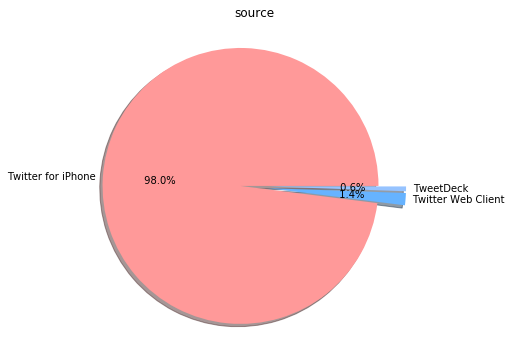

In [86]:
#Creat a pie chart showing which source is the most popular

pie_data = twitter_archive_master.source.value_counts()
print(pie_data)

label_list = pie_data.index
sizes = pie_data
explode_list = (0, 0.2,0.2)
fig1, ax1 = plt.subplots(figsize=(6, 6))
colors = ['#ff9999','#66b3ff','#96c3ff']
ax1.pie(
    sizes, explode = explode_list,colors=colors, labels = label_list, autopct =' %1.1f%%',
    pctdistance = 0.6, labeldistance = 1.05, shadow = True, startangle = 0,
    )

ax1.axis('equal') 
ax1.set_title('source')
plt.show()

It seems that Twitter for iPhone is by far the most popular option, with 93,7% of the tweets coming from this source.

 2) Which dog stage has the most retweets?

dog_stage
doggo      7125.698413
floofer    4968.714286
pupper     2382.502488
puppo      6473.954545
dtype: float64


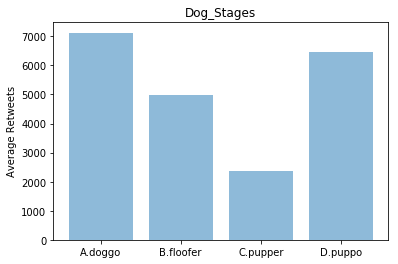

In [87]:
d1 = twitter_archive_master.groupby(['dog_stage']).sum()['retweet_count']

d2 = twitter_archive_master.groupby(['dog_stage']).count()['tweet_id']

a=d1/d2

print(a)

objects =['A.doggo','B.floofer','C.pupper','D.puppo']


y_pos = np.arange(len(objects))


plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Retweets')
plt.title('Dog_Stages')

plt.show()

Doggo and puppo stages are the most popular, while the floofer and pupper stages are less retweeted.

3) Correlation between rating and retweets_count and favorites_count

In [88]:
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating_n,img_num,confidence_one,isdog_one,confidence_two,isdog_two,confidence_three,isdog_three
tweet_id,1.000000,0.025029,-0.017377,0.406658,0.657336,0.028784,0.217323,0.105093,0.120497,-0.001406,0.125234,-0.048374,0.097160
rating_numerator,0.025029,1.000000,0.185717,0.014695,0.010885,0.982313,-0.003180,-0.006851,-0.030819,-0.019802,-0.036417,-0.004347,-0.031140
rating_denominator,-0.017377,0.185717,1.000000,-0.018147,-0.025598,-0.001079,-0.017040,0.008220,-0.004699,-0.032092,-0.006066,0.006784,-0.000552
retweet_count,0.406658,0.014695,-0.018147,1.000000,0.912217,0.018309,0.110331,0.054113,0.004759,-0.017105,0.013033,-0.043549,0.010602
favorite_count,0.657336,0.010885,-0.025598,0.912217,1.000000,0.015801,0.140521,0.079118,0.051361,-0.020437,0.057906,-0.053129,0.041688
rating_n,0.028784,0.982313,-0.001079,0.018309,0.015801,1.000000,-0.000190,-0.008622,-0.029792,-0.014040,-0.035214,-0.005267,-0.031205
img_num,0.217323,-0.003180,-0.017040,0.110331,0.140521,-0.000190,1.000000,0.203079,0.032539,-0.156733,0.056838,-0.137621,0.058653
confidence_one,0.105093,-0.006851,0.008220,0.054113,0.079118,-0.008622,0.203079,1.000000,0.128491,-0.509386,0.146056,-0.706711,0.123021
isdog_one,0.120497,-0.030819,-0.004699,0.004759,0.051361,-0.029792,0.032539,0.128491,1.000000,0.109923,0.639559,0.048366,0.561975
confidence_two,-0.001406,-0.019802,-0.032092,-0.017105,-0.020437,-0.014040,-0.156733,-0.509386,0.109923,1.000000,0.095335,0.479390,0.062234


Although correlation between rating_n and retweet_count/favorites_count is positive, it is still very low to conclude that there is a positive interaction between rating and retweeting.

4) Which dog breeds have better chances to be recognized by the algorithm?

In [522]:
# Group by the values of prediction one, taking into account that confidence_one will be higher than 0.75

df=twitter_archive_master[(twitter_archive_master['confidence_one']>0.75) & (twitter_archive_master['isdog_one']==True)]

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 10 to 1950
Data columns (total 23 columns):
tweet_id              533 non-null int64
timestamp             533 non-null datetime64[ns, UTC]
source                533 non-null object
text                  533 non-null object
expanded_urls         533 non-null object
rating_numerator      533 non-null int64
rating_denominator    533 non-null int64
name                  533 non-null object
retweet_count         533 non-null int64
favorite_count        533 non-null int64
dog_stage             91 non-null object
rating_n              533 non-null float64
jpg_url               533 non-null object
img_num               533 non-null int64
prediction_one        533 non-null object
confidence_one        533 non-null float64
isdog_one             533 non-null bool
prediction_two        533 non-null object
confidence_two        533 non-null float64
isdog_two             533 non-null bool
prediction_three      533 non-null object
confid

In [540]:
v1=df.groupby(['prediction_one']).count()['tweet_id'].sort_values(ascending=False).head(15)
print(v1)


prediction_one
Golden_retriever            75
Pembroke                    47
Labrador_retriever          40
Pug                         34
Chihuahua                   25
Samoyed                     22
Pomeranian                  22
Chow                        16
French_bulldog              14
Toy_poodle                  13
Malamute                    10
German_shepherd              9
Maltese_dog                  8
Shetland_sheepdog            8
Chesapeake_bay_retriever     7
Name: tweet_id, dtype: int64


5. Test optical if the algorithm predicts well that the object is a dog

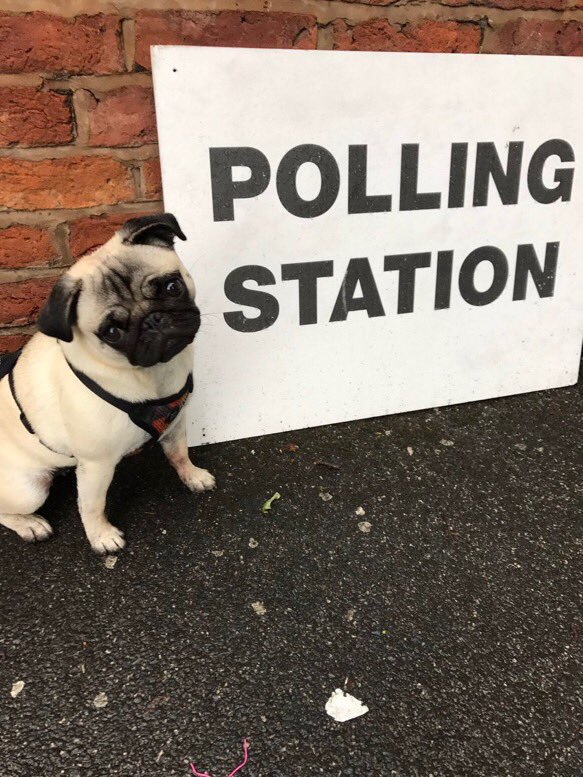

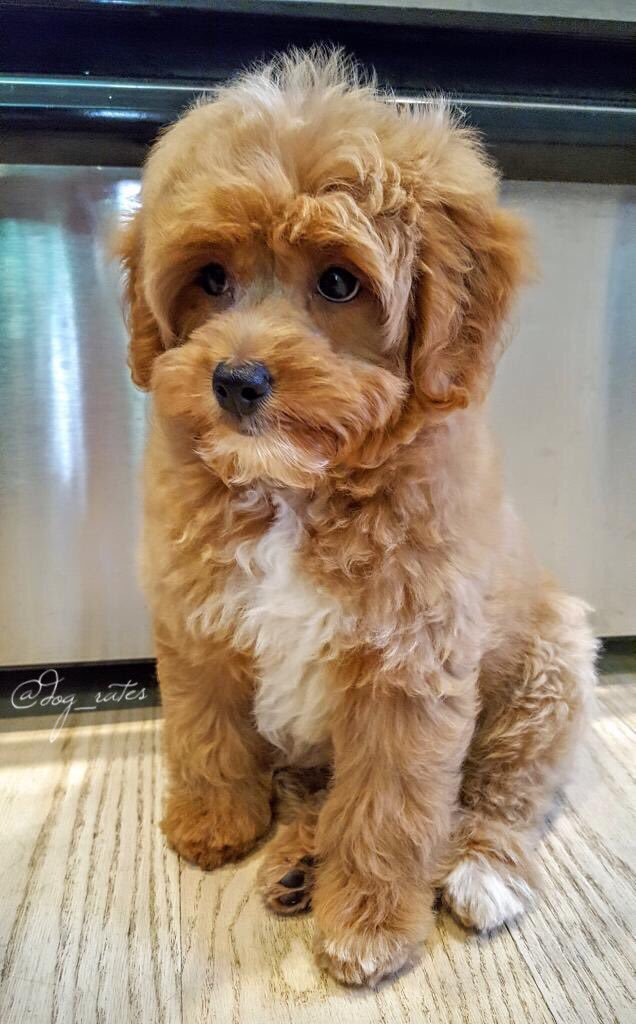

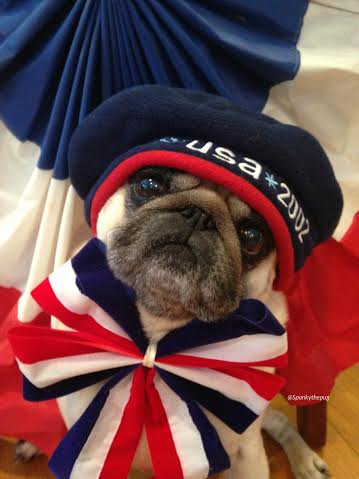

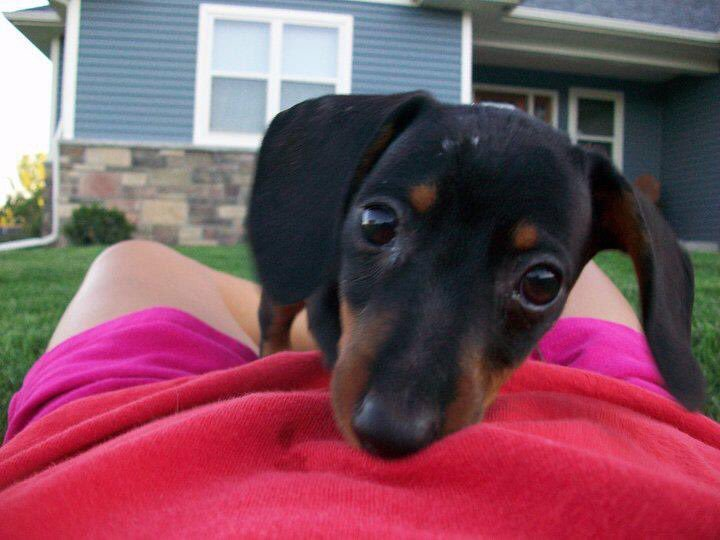

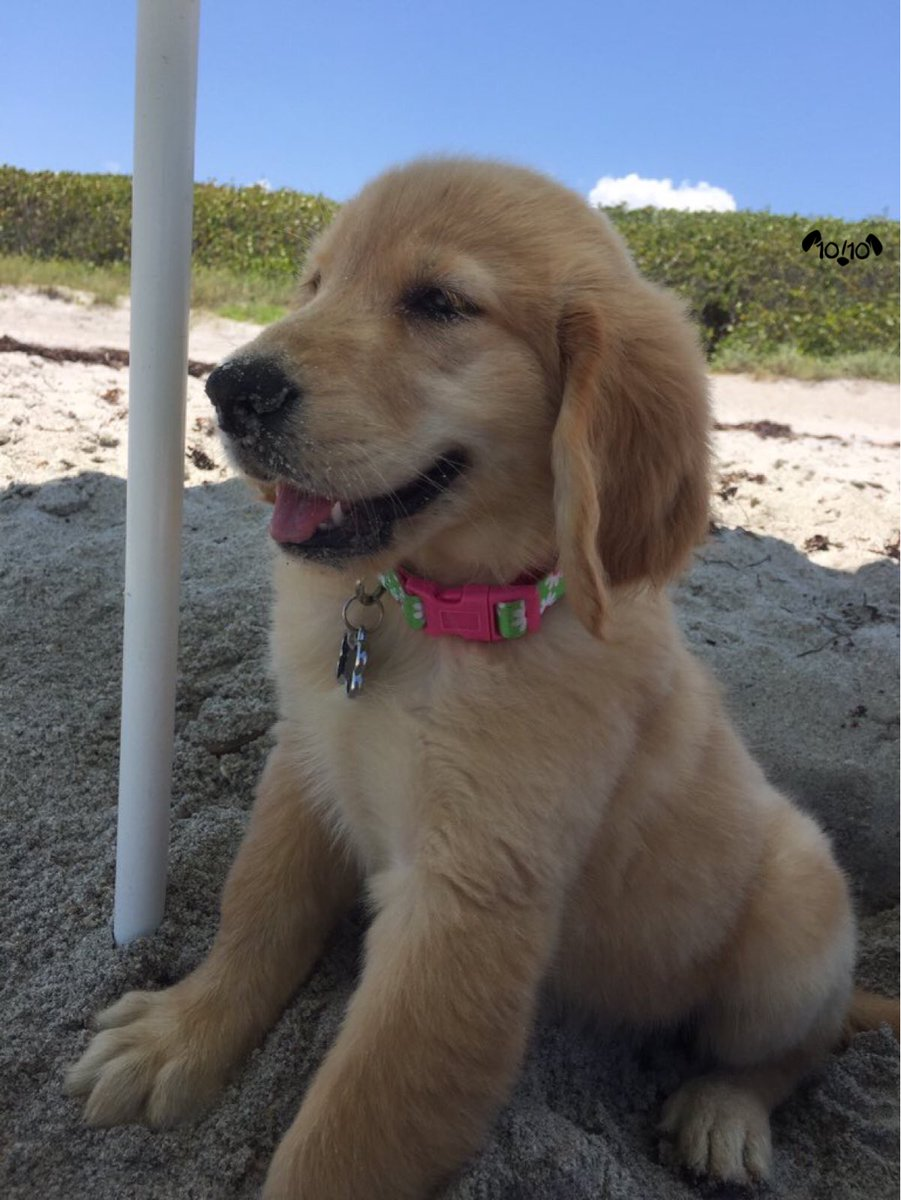

In [542]:
# Random selection of the above prediction to check if the algorithm has predicted well that is a dog 

import random
from IPython.core.display import Image, display

samples = np.random.choice(df.jpg_url,size = 5, replace = None)
for sample in samples:
    display(Image(sample, width=200, unconfined=True))

From the 5 pictures it seems that the algorith works quite well, as every picture contains a dog.

Continuing the analysis,some visualizations we will be included only in the act_report, because we will use tableau for some extra visuals.

#### Conclusion

The aim of this project was to gather ,assess, clean and finally analyze the wrangled dataset. More detailed, you will find a dedicated report for the wrangling and also a report for the data analysis containing both insights and visualizations. 


#### References


https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/

https://github.com/anoru/Wrangling-Data-WeRateDogs/blob/master/wrangle_act.ipynb

https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas

